In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


# загрузим данные
df = pd.read_csv("../../data/airbnb.csv")
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Задание 8.4
Для датасета Airbnb проведите иерархическую агломеративную кластеризацию с использованием sklearn. В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

In [16]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

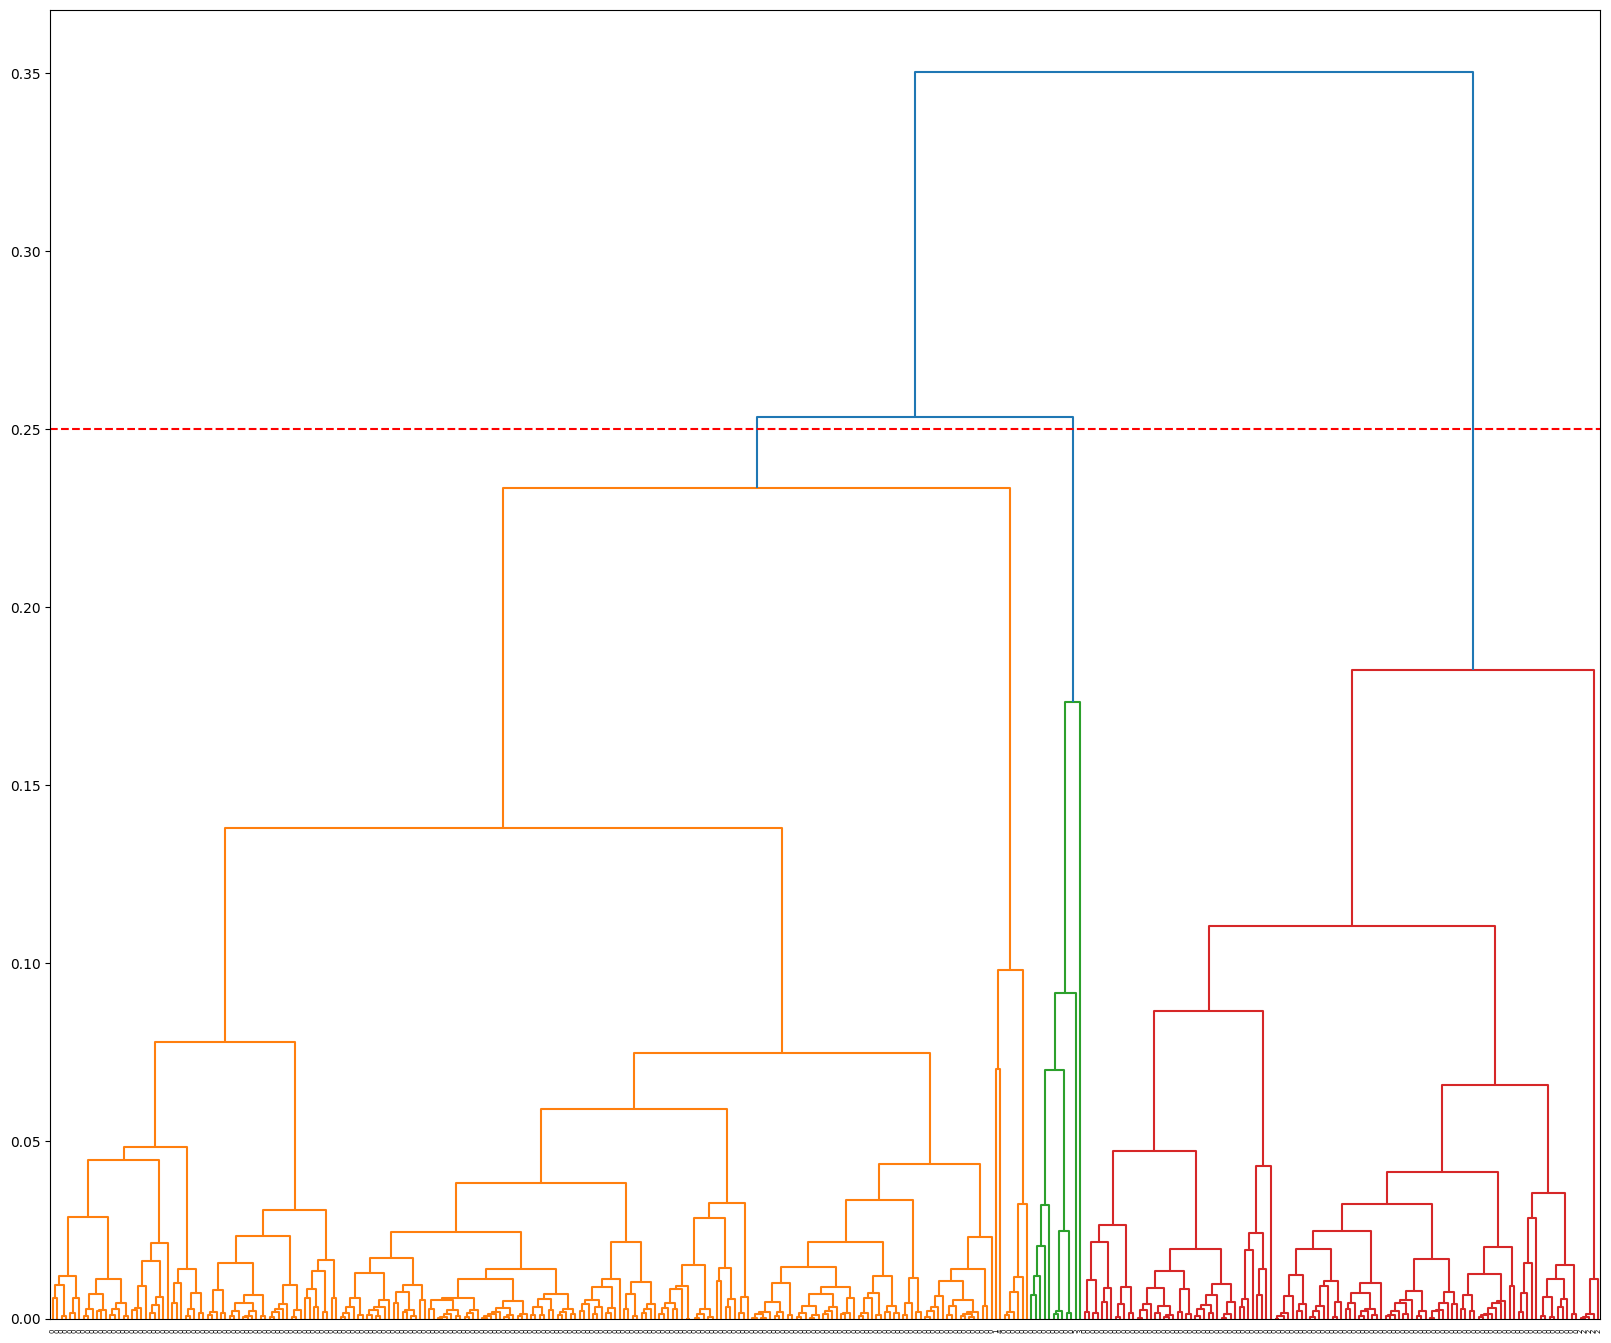

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# расссчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'complete')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между друг другом
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')
plt.axhline(y=0.25, color='r', linestyle='--')

plt.show()

### Задание 8.5
Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

Визуализируйте результаты. Сколько кластеров получилось на графике?

<Axes: xlabel='latitude', ylabel='longitude'>

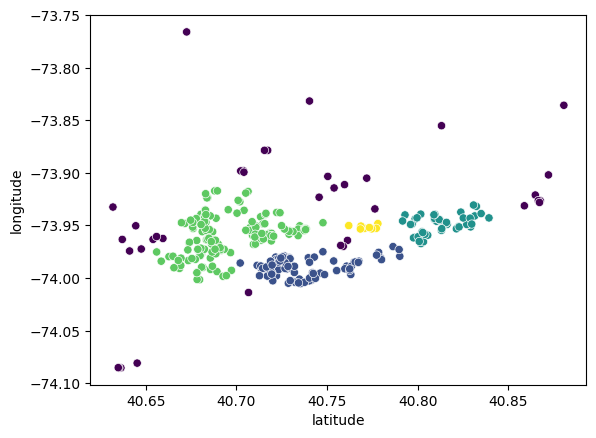

In [18]:
# df[["latitude", "longitude"]]
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[["latitude", "longitude"]])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.latitude, y=df.longitude, c=clustering.labels_)

In [30]:
# pd.Series(clustering.labels_)[pd.Series(clustering.labels_)>-1].value_counts()
pd.Series(clustering.labels_)[pd.Series(clustering.labels_)>-1].nunique()

4